In [1]:
%cd ..

/home/iking/code/CASTLE


In [2]:
import torch
episode = torch.load('data/sample_episode.pt')
episode

[Data(x=[16, 130], edge_index=[2, 26], names=[16]),
 Data(x=[16, 130], edge_index=[2, 26], names=[16]),
 Data(x=[21, 130], edge_index=[2, 35], names=[21]),
 Data(x=[22, 130], edge_index=[2, 39], names=[22]),
 Data(x=[22, 130], edge_index=[2, 39], names=[22]),
 Data(x=[30, 130], edge_index=[2, 54], names=[30]),
 Data(x=[30, 130], edge_index=[2, 58], names=[30]),
 Data(x=[30, 130], edge_index=[2, 58], names=[30]),
 Data(x=[30, 130], edge_index=[2, 58], names=[30]),
 Data(x=[37, 130], edge_index=[2, 72], names=[37]),
 Data(x=[37, 130], edge_index=[2, 77], names=[37]),
 Data(x=[37, 130], edge_index=[2, 77], names=[37]),
 Data(x=[38, 130], edge_index=[2, 79], names=[38]),
 Data(x=[38, 130], edge_index=[2, 81], names=[38]),
 Data(x=[38, 130], edge_index=[2, 81], names=[38]),
 Data(x=[38, 130], edge_index=[2, 81], names=[38]),
 Data(x=[38, 130], edge_index=[2, 81], names=[38]),
 Data(x=[38, 130], edge_index=[2, 81], names=[38]),
 Data(x=[38, 130], edge_index=[2, 81], names=[38]),
 Data(x=[38,

In [3]:
episode[-1].x[:,:3].nonzero()[:,1]

tensor([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

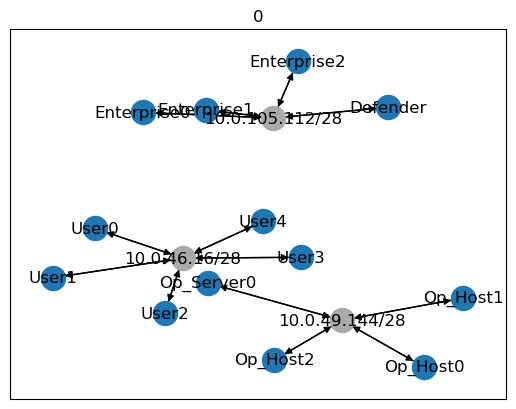

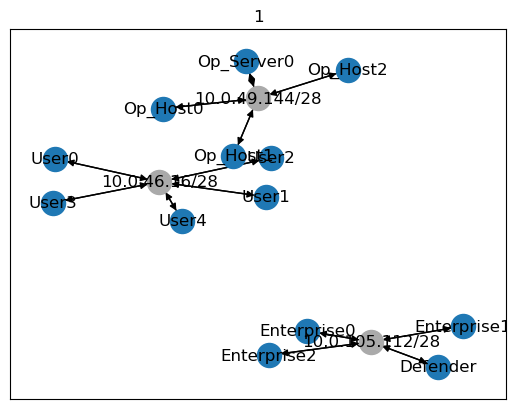

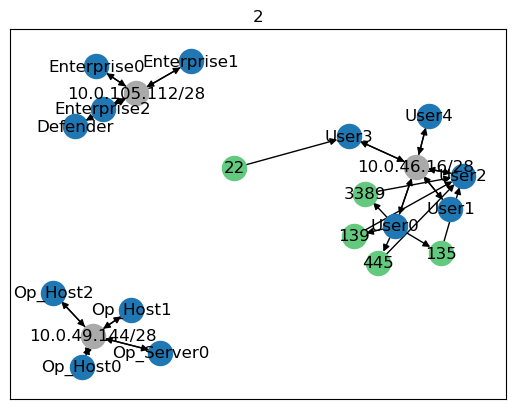

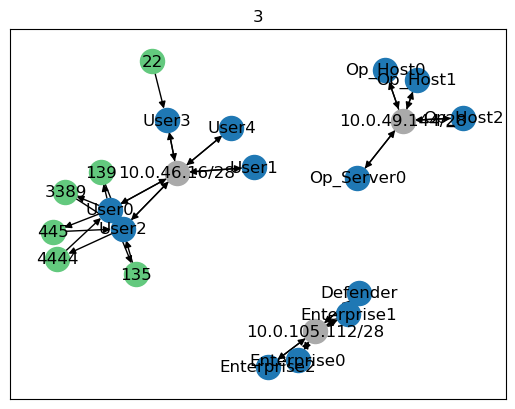

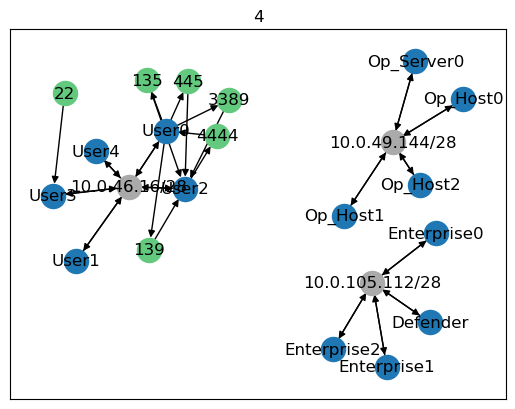

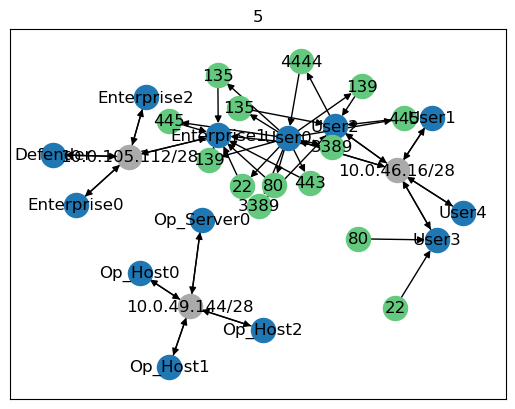

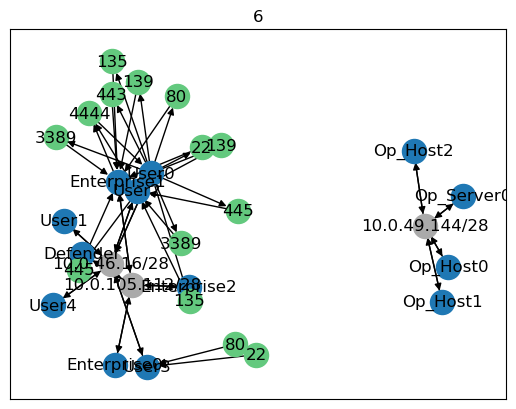

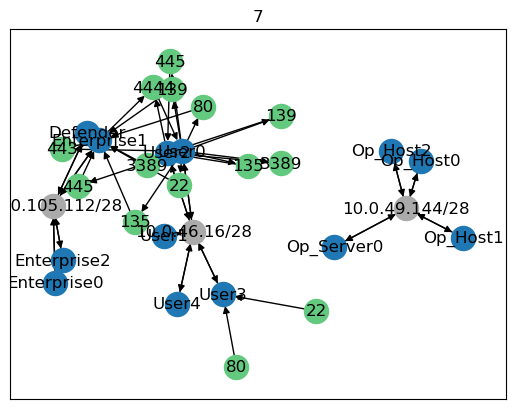

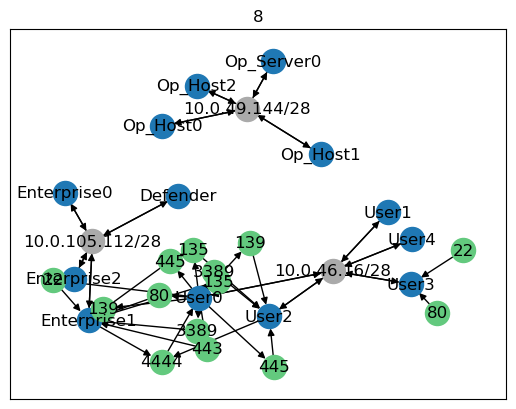

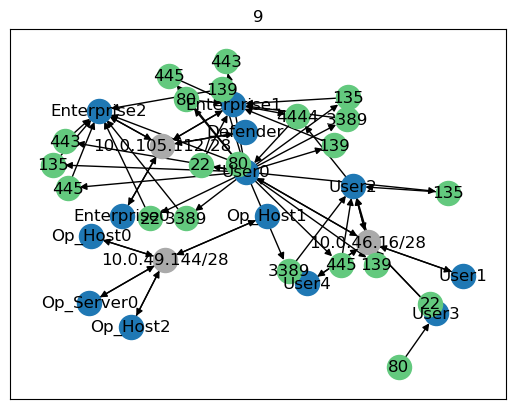

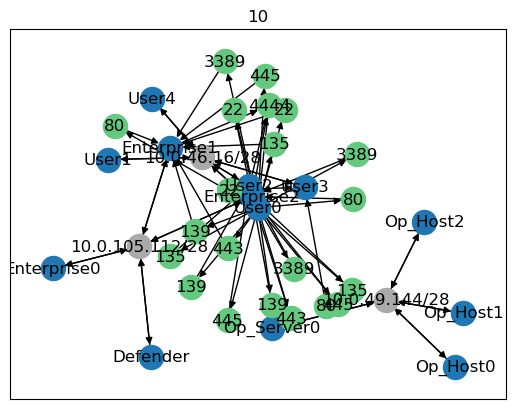

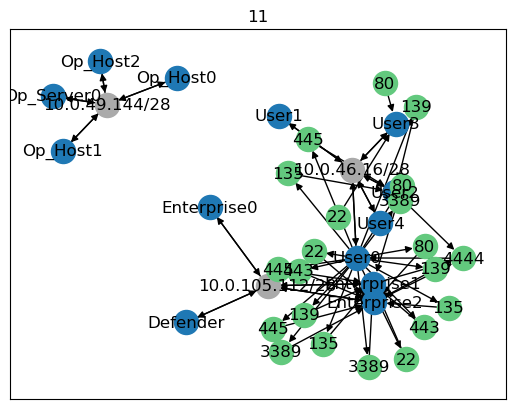

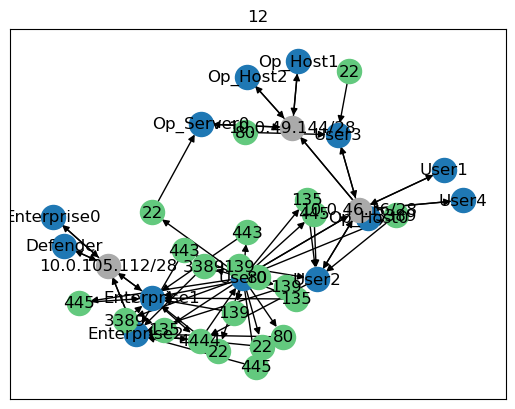

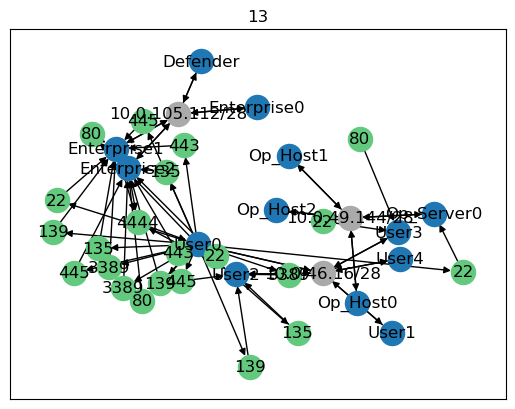

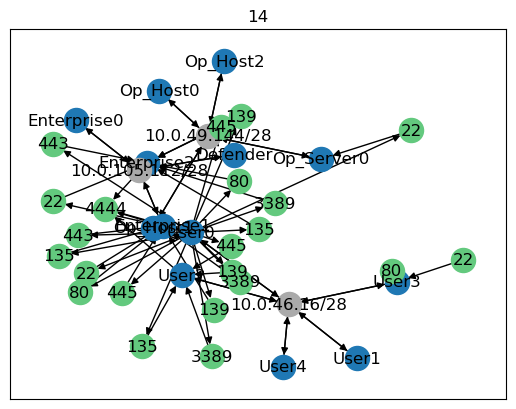

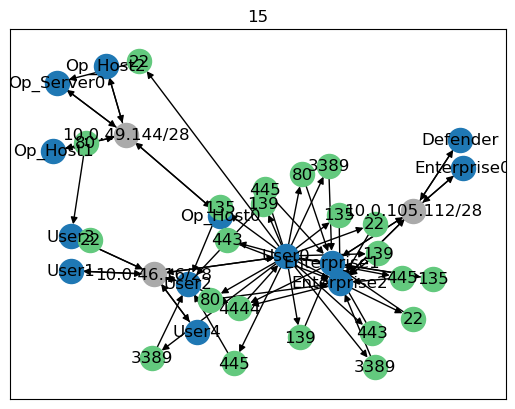

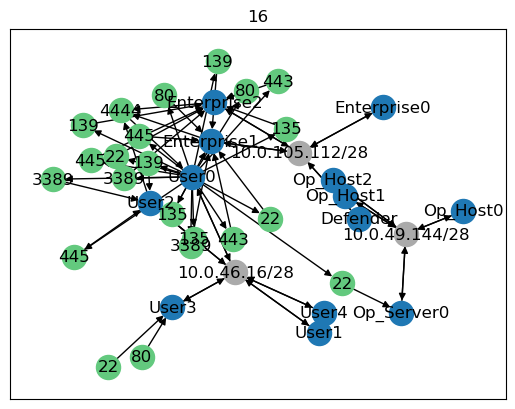

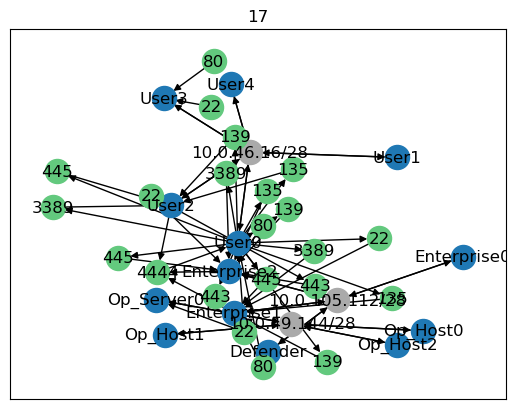

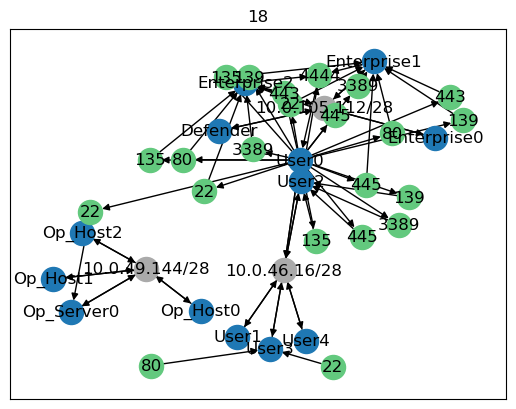

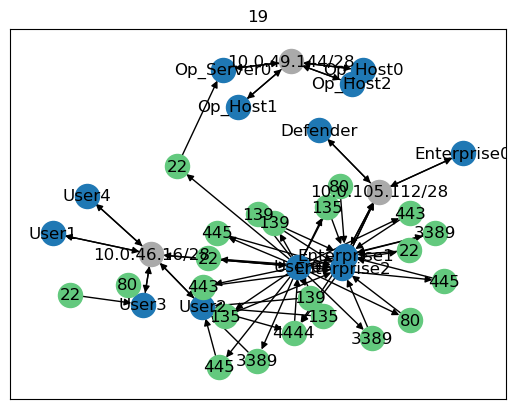

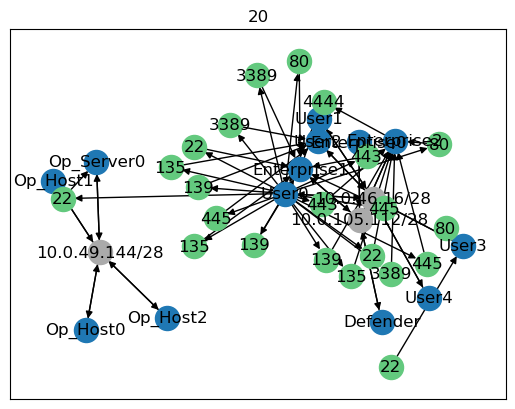

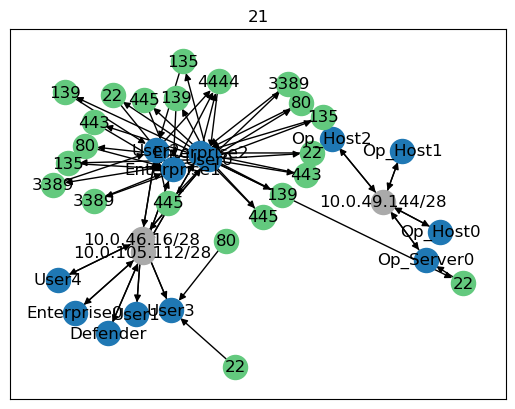

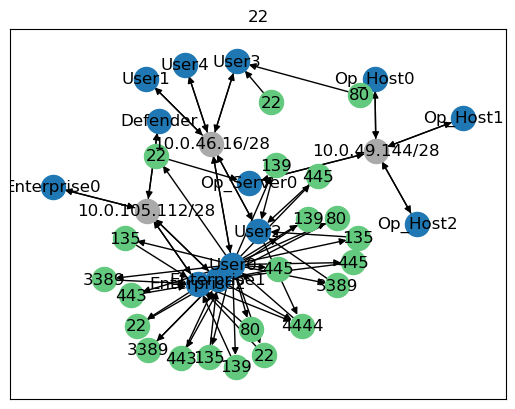

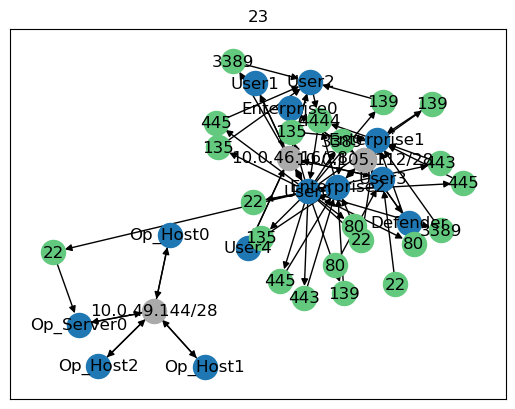

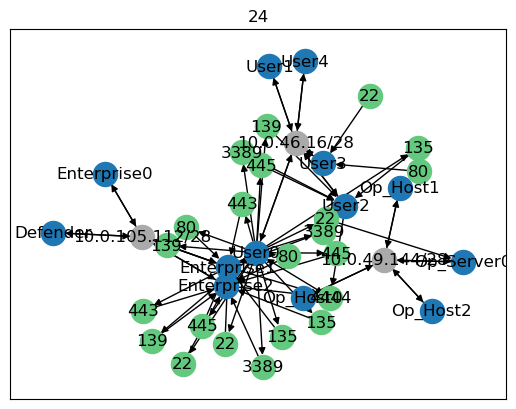

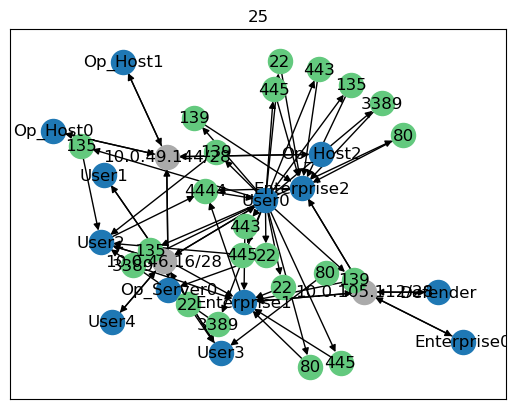

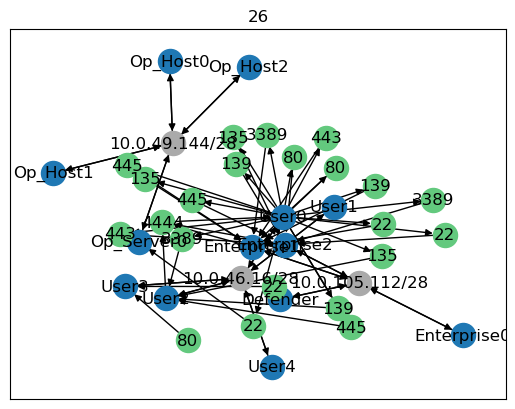

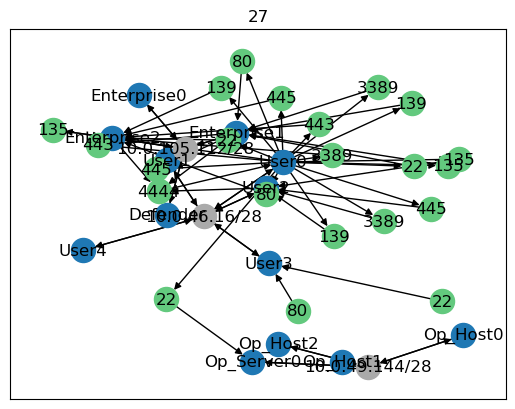

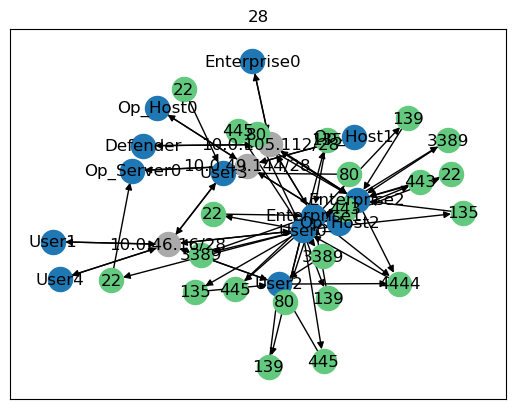

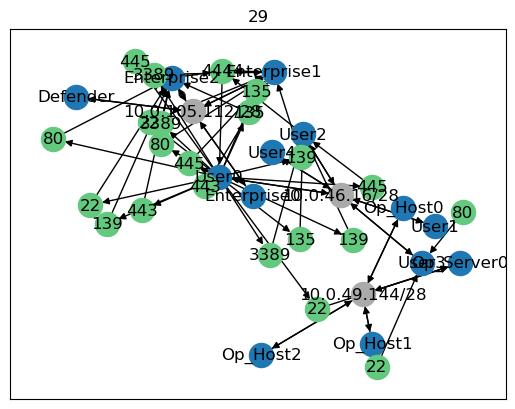

In [20]:
import networkx as nx 
import matplotlib.pyplot as plt 
from torch_geometric.utils import to_networkx 
ntypes = ['System', 'Subnet', 'Port/Process']

def nx_draw_one(i, data): 
    systems = (data.x[:,0] == 1).nonzero().squeeze(-1).numpy()
    subnets = (data.x[:,1] == 1).nonzero().squeeze(-1).numpy()
    ports = (data.x[:,2] == 1).nonzero().squeeze(-1).numpy()

    g = to_networkx(data)
    pos = nx.spring_layout(g, k=0.5, scale=3)
    nx.draw_networkx_nodes(g, pos, nodelist=systems)
    nx.draw_networkx_nodes(g, pos, nodelist=subnets, node_color='#aaa')
    nx.draw_networkx_nodes(g, pos, nodelist=ports, node_color='#63c97e')
    nx.draw_networkx_edges(g, pos)
    
    names = {i:n.split(':')[-1] for i,n in enumerate(data.names)}
    nx.draw_networkx_labels(g, pos, labels=names)
    plt.title(i)
    plt.show()

for i in range(len(episode)):
    nx_draw_one(i, episode[i])
